## Data Assessment

## Project Title :- Brain Tumor Prediction Using Image Classification (Group :- 11)

Our dataset consists the folder of brain's MRI image . There were Train and Test folders already on Kaggle for three different types of Tumors and one folder of no tumor so we merged all data to make it a meta data. 
Each folder has four subfolders of respective tumor classes. Brain-Tumors are classified into three categories
Glioma, Meningioma ,Pituitary and fourth class for No-tumor. For data preprocessing ,all images name are replaced
according to thier class and stored in a new folder 'raw_data'.
Exploratory data analysis is performed on csv file created from image description . Three new columns were added are
Class, noise, brisquescore to check data quality.
Additionally , Three best images of each class is filtered and displayed .



In [2]:
#import necessary libraries
import os
import tensorflow as tf
import seaborn as sns
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt
import imquality.brisque as brisque
from skimage import io,img_as_float
from skimage import io
import imgaug as ia
from imgaug import augmenters as iaa
import os
from PIL import Image
from matplotlib.image import imread
import cv2
import numpy as np

In [3]:
from tensorflow import keras
#from tensorflow.keras.applications.inception_v3 import InceptionV3, preprocess_input
#from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2, preprocess_input
from tensorflow.keras.applications.densenet import DenseNet201, preprocess_input
#from tensorflow.keras.applications.vgg19 import VGG19, preprocess_input
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, BatchNormalization, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow.keras.models import load_model

## Renaming images names according to their class

In [3]:
folder = r'E:/Brain_tumor/Testing/glioma_tumor/'
count = 1
for file_name in os.listdir(folder):
    # Construct old file name
    source = folder + file_name
  

    destination = r'E:/raw/' + "glioma_" + file_name 
    print(destination)
    # Renaming the file
    os.rename(source, destination)
    count += 1
res = os.listdir(r'E:/raw/')
#print('All Files Renamed')


## Creating a meta data further extracting image names, size and dimensions and writing it to a CSV file. Renaming the image names with specific class to avoid duplicate values while creating meta data.

In [4]:
folder = r'E:/Brain_tumor/Testing/meningioma_tumor/'
count = 1
for file_name in os.listdir(folder):
    # Construct old file name
    source = folder + file_name
  

    destination = r'E:/raw/' + "meningioma_" + file_name 
    print(destination)
    # Renaming the file
    os.rename(source, destination)
    count += 1
res = os.listdir(r'E:/raw/')
#print('All Files Renamed')

In [5]:
folder = r'E:/Brain_tumor/Testing/pituitary_tumor/'
count = 1
for file_name in os.listdir(folder):
    # Construct old file name
    source = folder + file_name
  

    destination = r'E:/raw/' + "pituitary_tumor_" + file_name 
    print(destination)
    # Renaming the file
    os.rename(source, destination)
    count += 1
res = os.listdir(r'E:/raw/')
#print('All Files Renamed')

In [6]:
folder = r'E:/Brain_tumor/Testing/no_tumor/'
count = 1
for file_name in os.listdir(folder):
    # Construct old file name
    source = folder + file_name
  

    destination = r'E:/raw/' + "no_tumor_" + file_name 
    print(destination)
    # Renaming the file
    os.rename(source, destination)
    count += 1
res = os.listdir(r'E:/raw/')
#print('All Files Renamed')

In [7]:
#code for extracting image names, size and dimensions and writing it to a CSV file

import os
import csv
from PIL import Image

# List of image files in the directory
images_dir = 'C:/Users/bogha/raw/'
image_files = [f for f in os.listdir(images_dir) if f.endswith('.jpg')]

# Extracting image names and dimensions and storing in a list of dictionaries
image_details = []
for image_file in image_files:
    image_path = os.path.join(images_dir, image_file)
    with Image.open(image_path) as img:
        image_details.append({'name': image_file, 'width': img.width, 'height': img.height , 'size' : os.path.getsize(image_path) , 'Class' : 'unique_class' })

# Writing the extracted information to a CSV file
filename = 'images_details.csv'
with open(filename, 'w', newline='') as f:
    writer = csv.DictWriter(f, fieldnames=['name', 'width', 'height','size','Class'])
    writer.writeheader()
    writer.writerows(image_details)

print(f"The file '{filename}' has been saved successfully.")

The file 'images_details.csv' has been saved successfully.


## ‘image_details’ is a dataframe we made, consisting of names of all images extracted and their respective dimensions.We’ll have a look at it to understand the image dataset we have at hand.

In [ ]:
 image_details

In [9]:
#loading images_details into dataframe
df = pd.DataFrame(image_details)  
df.columns

Index(['name', 'width', 'height', 'size', 'Class'], dtype='object')

In [10]:
df.head

<bound method NDFrame.head of                                name  width  height   size         Class
0                             1.jpg    350     350  35830  unique_class
1                             2.jpg    350     350  36763  unique_class
2                             3.jpg    605     613  41675  unique_class
3                             4.jpg    562     592  63465  unique_class
4                             5.jpg    442     442  26161  unique_class
...                             ...    ...     ...    ...           ...
3259  pituitary_tumor_image(95).jpg    383     436  35727  unique_class
3260  pituitary_tumor_image(96).jpg    512     512  46623  unique_class
3261  pituitary_tumor_image(97).jpg    512     512  46623  unique_class
3262  pituitary_tumor_image(98).jpg    538     548  80129  unique_class
3263      pituitary_tumor_image.jpg    512     512  38348  unique_class

[3264 rows x 5 columns]>

## Checking the null value in df

In [11]:
df.isnull().sum()

name      0
width     0
height    0
size      0
Class     0
dtype: int64

## Column specification

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3264 entries, 0 to 3263
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   name    3264 non-null   object
 1   width   3264 non-null   int64 
 2   height  3264 non-null   int64 
 3   size    3264 non-null   int64 
 4   Class   3264 non-null   object
dtypes: int64(3), object(2)
memory usage: 127.6+ KB


## Adding 3 new columns class,noise and brisque score

In [13]:
df["Class"] = ""
df["noise"] = ""
df["brisquescore"] = ""

In [14]:
df.shape

(3264, 7)

## Exctracting class names from the image files

In [15]:
df['name'] = df['name'].str[:-4]
df.loc[df['name'].str.startswith("p"),'Class'] =  "pituitary"
df.loc[df['name'].str.startswith("m"),'Class'] =  "meningioma"
df.loc[df['name'].str.startswith("g"),'Class'] =  "glioma"
df['Class'].replace('', 'No-tumor', inplace=True)

In [16]:
df

,name,width,height,size,Class,noise,brisquescore
0,1,350,350,35830,No-tumor,,
1,2,350,350,36763,No-tumor,,
2,3,605,613,41675,No-tumor,,
3,4,562,592,63465,No-tumor,,
4,5,442,442,26161,No-tumor,,
...,...,...,...,...,...,...,...
3259,pituitary_tumor_image(95),383,436,35727,pituitary,,
3260,pituitary_tumor_image(96),512,512,46623,pituitary,,
3261,pituitary_tumor_image(97),512,512,46623,pituitary,,
3262,pituitary_tumor_image(98),538,548,80129,pituitary,,


## From above result we can see that we have all together 3264 tumor img displed with their width, height, size, class, noise, and brisquescore. 

In [17]:
unique_class = df['Class'].value_counts()
unique_class

meningioma    937
glioma        926
pituitary     901
No-tumor      500
Name: Class, dtype: int64

## Here we have extracted the distribution of img in each class.where we can see that all the tumor class has almost double the number of images to that of no tumor class. 

## Fetching noise and brisquescore using python libraries
Here we are doing image filtering as a criterion for filtering noisy images. In this approach, Brisque score is used to evaluate the quality of the noisy image, and then a filter is applied to improve the quality of the image while preserving the image features that are important for the intended application.
The brisque score is numerical value that is calculated based on the features extracted from an image, and it ranges from 0 to 100. The higher the score, the better the image quality.

In [ ]:

folder = 'C:/Users/bogha/raw/'

arr = []
scorearr= []

for filename in os.listdir(folder):
    if filename.endswith('.jpg'):
        image = io.imread(os.path.join(folder, filename))

        # check the image format
        print(f'Image Name: {filename}')
        print(f'Image format: {image.dtype}')
        print(filename)
        print(folder)

        # check the image resolution
        print(f'Image shape: {image.shape}')

        # check the image brisquescore
        img1 = img_as_float(io.imread(f'{folder}{filename}',as_gray =True))
        score = brisque.score(img1)
        print(f'Image brisquescore : {score}')
        scorearr.append(score)

        
        # check the image noise
        noise = np.std(image)
        print(f'Image noise: {noise}')
        arr.append(noise)


In [30]:
df['noise'] = arr
df['brisquescore'] = scorearr

### df

## Checking null values

In [31]:
df.isna().sum()

name            0
width           0
height          0
size            0
Class           0
noise           0
brisquescore    0
dtype: int64

In [32]:
df.to_csv('C:/Users/bogha/Downloads/images_details.csv', index=False)

### Data Fitness

### Assessment for data fitness:

Looking at the values of the data, the data contains enough information to answer our classification.
We need to perform image transformation into numeric data, before proceeding to find classification of brain tumor. 
However, overall we find that the fitness of the data is good enough to perform classification of brain tumor.

### ETHICAL assessment

## A. Data Collection
 - [ ] **A.1 Informed consent**: If there are human subjects, have they given informed consent, where subjects affirmatively opt-in and have a clear understanding of the data uses to which they consent?
 ##### Since we found data of brain tumor image on kaggle, they must have ethical principle.We have not get any personal information while getting the images and the usage is very clear as well.
 - [ ] **A.2 Collection bias**: Have we considered sources of bias that could be introduced during data collection and survey design and taken steps to mitigate those?
 ##### We have been concerned about bias in image extraction but we did not have much relevant information like age, gender, medical history of patients, Date of birth.
 - [ ] **A.3 Limit PII exposure**: Have we considered ways to minimize exposure of personally identifiable information (PII) for example through anonymization or not collecting information that isn't relevant for analysis?
 ##### The dataset does not have any personally identifiable information as it does not contain any personal relavant information such as age,gender. 
 - [ ] **A.4 Downstream bias mitigation**: Have we considered ways to enable testing downstream results for biased outcomes (e.g., collecting data on protected group status like race or gender)?
#### NO
## B. Data Storage
 - [ ] **B.1 Data security**: Do we have a plan to protect and secure data (e.g., encryption at rest and in transit, access controls on internal users and third parties, access logs, and up-to-date software)?
 #### The team members will keep the access limited to themselves only, making sure no one except the 5 group members get to use the data. The images will also be saved on github with access to the team only.
 - [ ] **B.2 Right to be forgotten**: Do we have a mechanism through which an individual can request their personal information be removed?
 #### We dont have any personal information.
 - [ ] **B.3 Data retention plan**: Is there a schedule or plan to delete the data after it is no longer needed?
 ##### Yes, we can do permenantly delete the every images when we dont need for longer use from every device.

## C. Analysis
 - [ ] **C.1 Missing perspectives**: Have we sought to address blindspots in the analysis through engagement with relevant stakeholders (e.g., checking assumptions and discussing implications with affected communities and subject matter experts)?
 #### NO
 - [ ] **C.2 Dataset bias**: Have we examined the data for possible sources of bias and taken steps to mitigate or address these biases (e.g., stereotype perpetuation, confirmation bias, imbalanced classes, or omitted confounding variables)?
 ##### The dataset has been examined for bias-causing for no-tumor class. All other three classes has almost equal number of images per class except no-tumor class has half compared to other . There are 3624 images in our image dataset, and the class distribution is as follows: Glioma:926 , Pituitary: 901, Meningioma:937, and No-tumor: 500 . It is clear that the numbers are not balanced. These images will be used to train a machine learning model; the more images the model sees, the better.
 - [ ] **C.3 Honest representation**: Are our visualizations, summary statistics, and reports designed to honestly represent the underlying data?
 ##### The team has concentrated its efforts on accurately portraying the data in this data assessment in order to steer the project in the proper path rather than leading it astray.
 - [ ] **C.4 Privacy in analysis**: Have we ensured that data with PII are not used or displayed unless necessary for the analysis?
 ##### We dont have PII information in this project.
 - [ ] **C.5 Auditability**: Is the process of generating the analysis well documented and reproducible if we discover issues in the future?
 ##### The team has concentrated its efforts on accurately portraying the data in this data assessment in order to steer the project in the proper path rather than leading it in wrong path in the future.

## D. Modeling
##### We havenot started Modeling part yet. So Whenever we will start we can mention answers here in modeling.
 - [ ] **D.1 Proxy discrimination**: Have we ensured that the model does not rely on variables or proxies for variables that are unfairly discriminatory?
 ##### 
 - [ ] **D.2 Fairness across groups**: Have we tested model results for fairness with respect to different affected groups (e.g., tested for disparate error rates)?
 - [ ] **D.3 Metric selection**: Have we considered the effects of optimizing for our defined metrics and considered additional metrics?
 - [ ] **D.4 Explainability**: Can we explain in understandable terms a decision the model made in cases where a justification is needed?
 - [ ] **D.5 Communicate bias**: Have we communicated the shortcomings, limitations, and biases of the model to relevant stakeholders in ways that can be generally understood?      

## E. Deployment
##### We havenot started deployment yet but we are thinking to deploy our model into STREAMLIT.
 - [ ] **E.1 Redress**: Have we discussed with our organization a plan for response if users are harmed by the results (e.g., how does the data science team evaluate these cases and update analysis and models to prevent future harm)?
 - [ ] **E.2 Roll back**: Is there a way to turn off or roll back the model in production if necessary?
 - [ ] **E.3 Concept drift**: Do we test and monitor for concept drift to ensure the model remains fair over time?
 - [ ] **E.4 Unintended use**: Have we taken steps to identify and prevent unintended uses and abuse of the model and do we have a plan to monitor these once the model is deployed? 


## Counting images of each class and creating a plot

In [33]:
unique_class

meningioma    937
glioma        926
pituitary     901
No-tumor      500
Name: Class, dtype: int64

## Plotting graph for each class count as mentioned above we can now clearly see that noise is almost half the other classes mentioned.

<AxesSubplot:xlabel='Class', ylabel='count'>

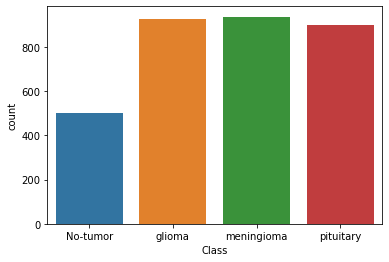

In [34]:
sns.countplot(x=df['Class'])

## We have some of the class imbalance here as the number of images varies.

<AxesSubplot:xlabel='height', ylabel='Count'>

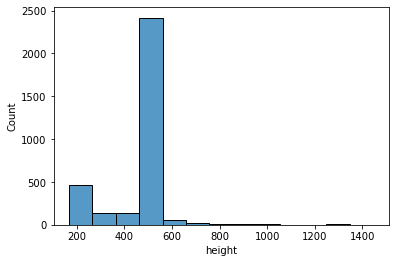

In [35]:
sns.histplot(x=df['height'])

## The distribution of images’ heights is right skewed, most the images have height of 500 they are almost 2400 in count.500 images have height of 200. Same applies to the width of the images.

<AxesSubplot:xlabel='width', ylabel='Count'>

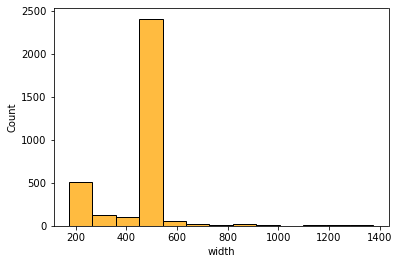

In [36]:
sns.histplot(x=df['width'],color='orange')

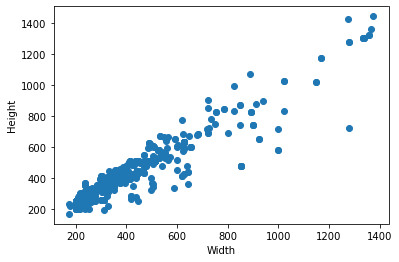

In [37]:
# Create the scatter plot
plt.scatter(df.width, df.height)

# Label the axes
plt.xlabel('Width')
plt.ylabel('Height')

# Display the plot
plt.show()

## We can see outliers in scatter plot for image resolution.

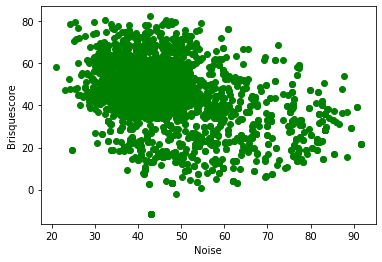

In [38]:
# Create the scatter plobrisquet
plt.scatter(df.noise, df.brisquescore,c='green')

# Label the axes
plt.xlabel('Noise')
plt.ylabel('Brisquescore')

# Display the plot
plt.show()

## We can see outliers in scatter plot for natural quality of image

## Filtering images using brisquescore and noise

In [39]:

grouped = df.groupby('Class')

display_images = {}


for name, group in grouped:
    # Sort the group by "noise" and "brisquescore" in ascending order
    sorted_group = group.sort_values(by=['noise', 'brisquescore'])
    
    # Select the first three rows of the sorted group
    selected_group = sorted_group.iloc[:3, :]
     # Add the selected group to the dictionary under the class name
    display_images[name] = selected_group
    
selected_df = pd.concat(display_images.values())

In [40]:
selected_df

,name,width,height,size,Class,noise,brisquescore
1073,image(170),852,480,28828,No-tumor,24.121515,78.871040
970,image (45),236,236,9825,No-tumor,24.671297,18.998145
2296,No_tumor_image(4),236,236,12408,No-tumor,24.671297,18.998145
543,gg (581),512,512,19035,glioma,21.021132,58.442184
226,gg (296),512,512,21494,glioma,23.960470,52.730299
499,gg (541),512,512,13285,glioma,25.487901,79.756662
1977,m3 (172),512,512,30585,meningioma,25.337627,47.906435
1973,m3 (169),512,512,25465,meningioma,26.092971,44.875511
1976,m3 (171),512,512,31376,meningioma,27.796018,48.326766
3094,p (758),512,512,29284,pituitary,22.994571,47.311151


## Plotting best images using brisquescore and noise

Class : No-tumor


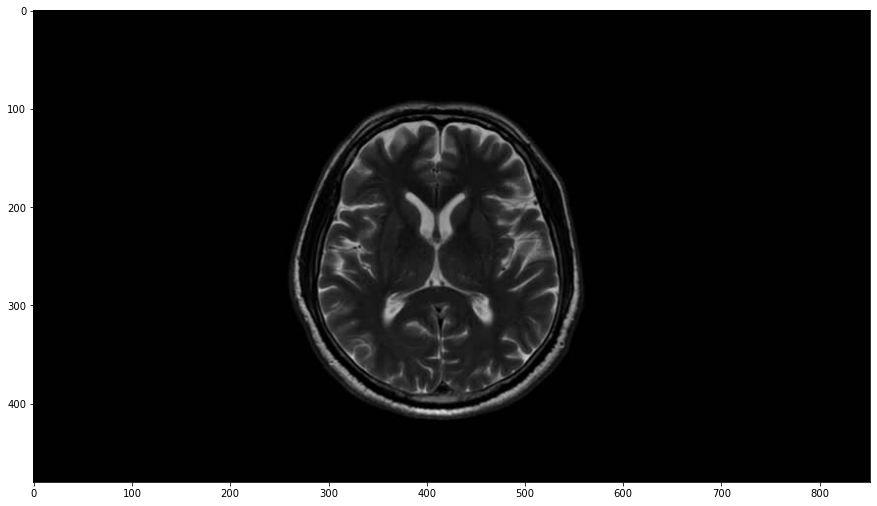

Class : No-tumor


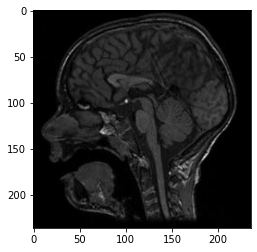

Class : No-tumor


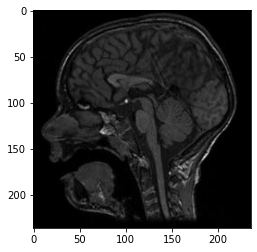

Class : glioma


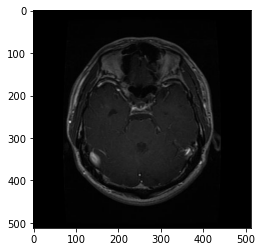

Class : glioma


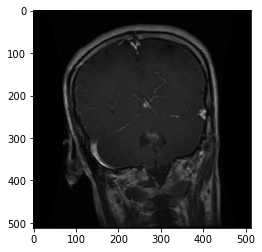

Class : glioma


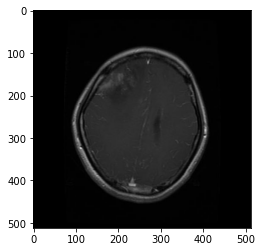

Class : meningioma


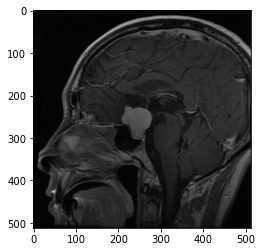

Class : meningioma


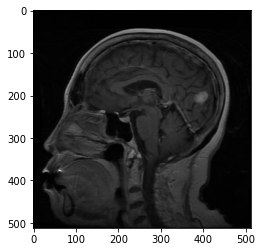

Class : meningioma


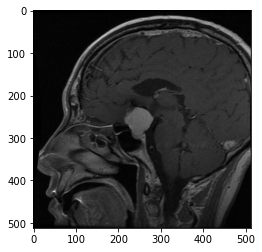

Class : pituitary


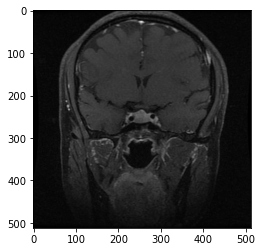

Class : pituitary


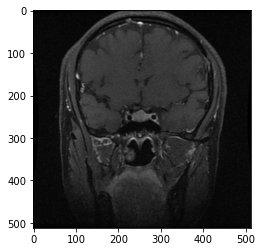

Class : pituitary


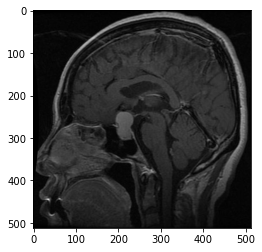

In [41]:

folder = "C:/Users/bogha/raw/"
count=0
plt.figure(figsize=(15,15))
for index, row in selected_df.iterrows():
    # Get the file name from the "filename" column
    filename = f'{selected_df.name.values[count]}.jpg'
    print(f'Class : {selected_df.Class.values[count]}')
    
    # Construct the full path to the image
    filepath = os.path.join(folder, filename)
    
    
    # Read the image using imread
    img = imread(filepath)
    plt.imshow(img)
    
    # Show the plot
    plt.show()
    count+=1

## The criteria for what constitutes a good image for a particular task are such as For example, in object detection, an image with clear and well-lit objects that are centered and not occluded by other objects might be considered a "good" image for the task of detecting those objects. In medical imaging, a high-resolution image with good contrast and accurate labeling of anatomical structures might be considered a "good" image.


## Random Forest Model


In [116]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [131]:
# Define the directories where the training data is stored
dir1 = 'C:/Users/Rechel Rebello/Desktop/Capstone_project/brain_tumor/Training/glioma_tumor'
dir3 = 'C:/Users/Rechel Rebello/Desktop/Capstone_project/brain_tumor/Training/meningioma_tumor'
dir2 = 'C:/Users/Rechel Rebello/Desktop/Capstone_project/brain_tumor/Training/pituitary_tumor'
dir4 = 'C:/Users/Rechel Rebello/Desktop/Capstone_project/brain_tumor/Training/no_tumor'

# Define the categories or classes of data
categories = ['no-tumor', 'pituitary' , 'meningioma' , 'glioma']

In [132]:
# Define the function to read and resize images
def read_and_resize_img(filepath):
    img = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
    img_resized = cv2.resize(img, (100,100))
    return img_resized

In [133]:
# Read in the training data
X = []
y = []
for category in categories:
    # Iterate over the four directories
    for dir in [dir1, dir2, dir3, dir4]:
        # Get a list of all files in the current directory that end in ".jpg"
        files = [f for f in os.listdir(dir) if f.endswith('.jpg')]
        for file in files:
            # Read in and resize the current image file
            img = read_and_resize_img(os.path.join(dir, file))
            # Append the image data to the input array X and the category label to the output array y
            X.append(img)
            y.append(category)

In [134]:
# Convert the input and output arrays to numpy arrays
X = np.array(X)
y = np.array(y)

# Flatten the input array to a 1D array
X = X.reshape(X.shape[0], -1)

In [135]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [136]:
# Train the Random Forest model
rfc = RandomForestClassifier(n_estimators=10)
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10)

In [137]:
# Use the trained model to predict the classes of the testing data
y_pred = rfc.predict(X_test)

array(['pituitary', 'pituitary', 'pituitary', ..., 'glioma', 'no-tumor',
       'pituitary'], dtype='<U10')

In [138]:
# Print the accuracy score and confusion matrix
print("Accuracy score:", accuracy_score(y_test, y_pred))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy score: 0.0021777003484320556
Confusion matrix:
 [[  3 188 175 180]
 [210   1 187 201]
 [215 191   1 162]
 [227 173 182   0]]


In [149]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.multiclass import OneVsOneClassifier
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

binary_clf = OneVsRestClassifier(rfc)
binary_clf.fit(X_train, y_train)
binary_preds = binary_clf.predict(X_test)
binary_accuracy = accuracy_score(y_test, binary_preds)
print("Binary accuracy:", binary_accuracy)

Binary accuracy: 0.89


In [152]:
from sklearn.metrics import precision_score, recall_score

# Calculate the precision and recall
precision = precision_score(y_test, binary_preds)
recall = recall_score(y_test, binary_preds)

# Print the results
print("Precision:", precision)
print("Recall:", recall)


Precision: 0.9494949494949495
Recall: 0.8468468468468469


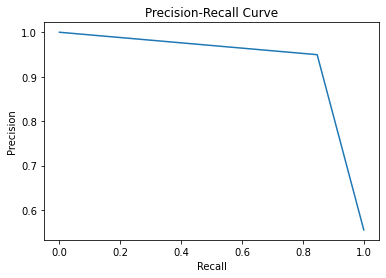

In [155]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve

# Calculate the precision and recall
precision, recall, _ = precision_recall_curve(y_test, binary_preds)

# Plot the precision-recall curve
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

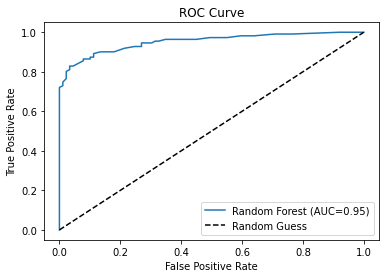

In [175]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f'Random Forest (AUC={roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

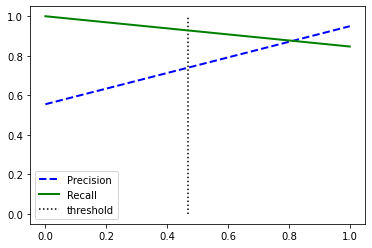

In [171]:
from sklearn.metrics import precision_recall_curve
thresholds = 
precisions, recalls,thresolds = precision_recall_curve(
    y_test, binary_preds)

plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
plt.vlines(threshold, 0, 1.0, "k", "dotted", label="threshold")
plt.legend()
plt.show()

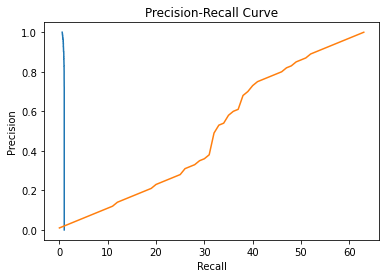

In [144]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

# generate a toy dataset
X, y = make_classification(n_samples=1000, n_features=10, random_state=42)

# split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# initialize random forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# train the model
rf.fit(X_train, y_train)

# make predictions on the testing set
y_scores = rf.predict_proba(X_test)[:, 1]


# calculate precision and recall scores
precision, recall, thresholds = precision_recall_curve(y_test, y_scores)

# plot precision-recall curve

plt.plot(precision, recall, thresholds )

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

## Densenet 205 

In [11]:
# General Libs
from tensorflow import keras
#from tensorflow.keras.applications.inception_v3 import InceptionV3, preprocess_input
#from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2, preprocess_input
from tensorflow.keras.applications.densenet import DenseNet201, preprocess_input
#from tensorflow.keras.applications.vgg19 import VGG19, preprocess_input
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, BatchNormalization, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow.keras.models import load_model

In [12]:
im_shape = (250,250)


TRAINING_DIR = "C:/Users/Rechel Rebello/Desktop/Capstone_project/brain_tumor/Training"
TEST_DIR ="C:/Users/Rechel Rebello/Desktop/Capstone_project/brain_tumor/Testing"

seed = 10

BATCH_SIZE = 16

In [13]:
data_generator = ImageDataGenerator(rescale=1./255, validation_split=0.3)
val_data_generator = ImageDataGenerator(rescale=1./255, validation_split=0.3)

In [14]:
train_generator = data_generator.flow_from_directory(TRAINING_DIR, target_size=im_shape, shuffle=True, seed=seed,
                                                     class_mode='categorical', batch_size=BATCH_SIZE, subset="training")
print(train_generator)
# Generator para parte validação
validation_generator = val_data_generator.flow_from_directory(TRAINING_DIR, target_size=im_shape, shuffle=False, seed=seed,
                                                     class_mode='categorical', batch_size=BATCH_SIZE, subset="validation")

# Generator para dataset de teste
test_generator = ImageDataGenerator(rescale=1./255)
test_generator = test_generator.flow_from_directory(TEST_DIR, target_size=im_shape, shuffle=False, seed=seed,
                                                     class_mode='categorical', batch_size=BATCH_SIZE)

nb_train_samples = train_generator.samples
nb_validation_samples = validation_generator.samples
nb_test_samples = test_generator.samples
classes = list(train_generator.class_indices.keys())
print('Classes: '+str(classes))
num_classes  = len(classes)

Found 2011 images belonging to 4 classes.
Found 859 images belonging to 4 classes.
Found 394 images belonging to 4 classes.
Classes: ['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']


In [15]:
train_generator

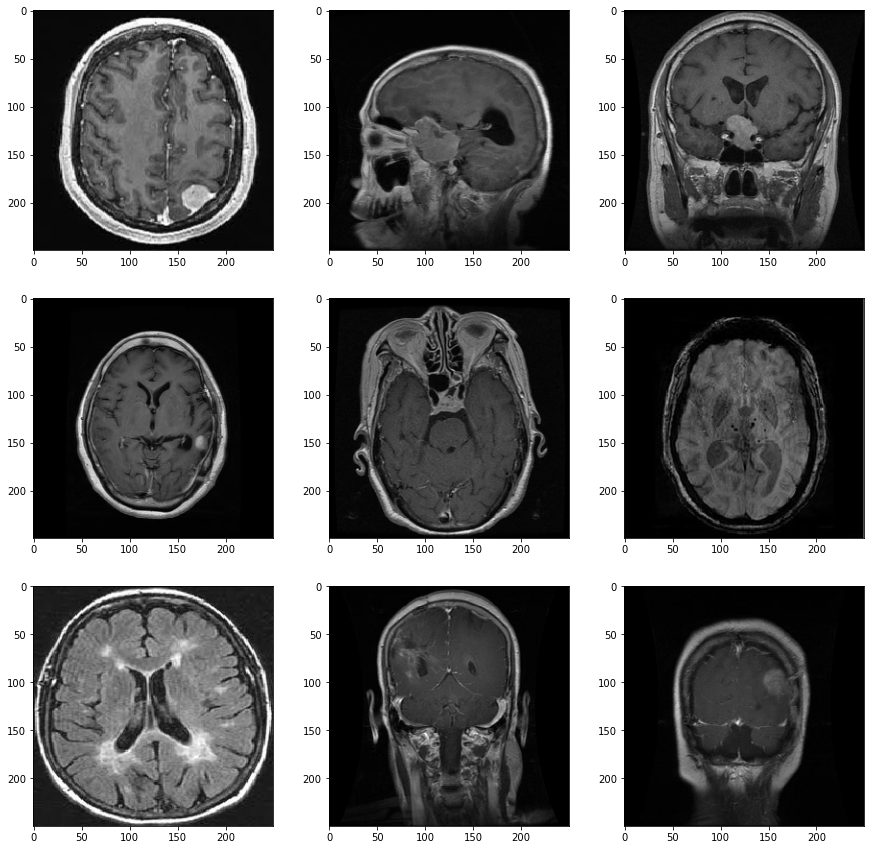

In [16]:
plt.figure(figsize=(15,15))
for i in range(9):
    #gera subfigures
    plt.subplot(330 + 1 + i)
    batch = train_generator.next()[0]*255
    image = batch[0].astype('uint8')
    plt.imshow(image)
plt.show()

In [17]:
model = Sequential()
model.add(Conv2D(200, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(im_shape[0],im_shape[1],3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(100, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) #adicionado novo pooling
model.add(Conv2D(100, kernel_size=(3,3), activation='relu'))#adicionei mais uma camada de neuronios
model.add(Flatten())
model.add(Dense(300, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

# Compile a model
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 248, 248, 200)     5600      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 124, 124, 200)    0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 122, 122, 100)     180100    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 61, 61, 100)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 59, 59, 100)       90100     
                                                                 
 flatten (Flatten)           (None, 348100)            0

In [18]:
epochs = 5

#Callback to save the best model
callbacks_list = [
    keras.callbacks.ModelCheckpoint(
        filepath='model.h5',
        monitor='val_loss', save_best_only=True, verbose=1),
    keras.callbacks.EarlyStopping(monitor='val_loss', patience=10,verbose=1)
]

#Training
history = model.fit(
        train_generator,
        steps_per_epoch=nb_train_samples // BATCH_SIZE,
        epochs=epochs,
        callbacks = callbacks_list,
        validation_data=validation_generator,
        verbose = 1,
        validation_steps=nb_validation_samples // BATCH_SIZE)

Epoch 1/5
125/125 [==============================] - ETA: 0s - loss: 1.0126 - accuracy: 0.6456
Epoch 1: val_loss improved from inf to 1.07132, saving model to model.h5
125/125 [==============================] - 1410s 11s/step - loss: 1.0126 - accuracy: 0.6456 - val_loss: 1.0713 - val_accuracy: 0.5165
Epoch 2/5
125/125 [==============================] - ETA: 0s - loss: 0.4330 - accuracy: 0.8306
Epoch 2: val_loss did not improve from 1.07132
125/125 [==============================] - 1187s 10s/step - loss: 0.4330 - accuracy: 0.8306 - val_loss: 1.0894 - val_accuracy: 0.5696
Epoch 3/5
125/125 [==============================] - ETA: 0s - loss: 0.1914 - accuracy: 0.9348 
Epoch 3: val_loss did not improve from 1.07132
125/125 [==============================] - 1368s 11s/step - loss: 0.1914 - accuracy: 0.9348 - val_loss: 1.5327 - val_accuracy: 0.5884
Epoch 4/5
125/125 [==============================] - ETA: 0s - loss: 0.1037 - accuracy: 0.9659
Epoch 4: val_loss did not improve from 1.07132
125

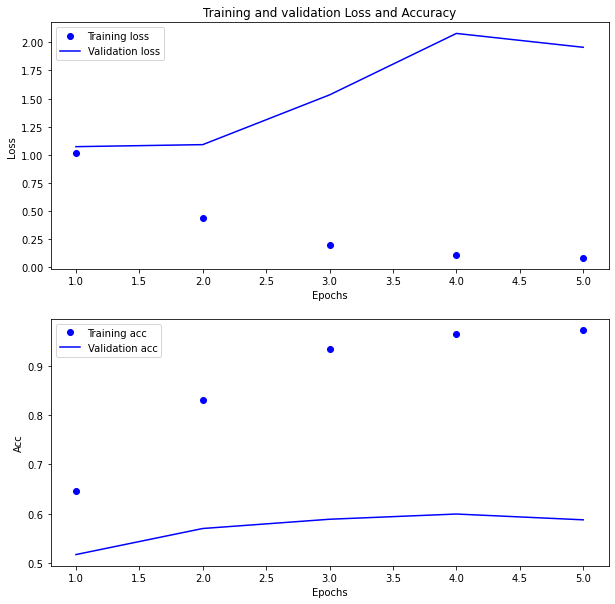

In [19]:
# Training curves
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs_x = range(1, len(loss_values) + 1)
plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
plt.plot(epochs_x, loss_values, 'bo', label='Training loss')
plt.plot(epochs_x, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation Loss and Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.subplot(2,1,2)
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs_x, acc_values, 'bo', label='Training acc')
plt.plot(epochs_x, val_acc_values, 'b', label='Validation acc')
#plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()
plt.show()


In [20]:
from tensorflow.keras.models import load_model

model = load_model('model.h5')

In [21]:
# Using the validation dataset
score = model.evaluate_generator(validation_generator)
print('Val loss:', score[0])
print('Val accuracy:', score[1])

C:\Users\RECHEL~1\AppData\Local\Temp/ipykernel_16688/1237713776.py:2: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  score = model.evaluate_generator(validation_generator)


Val loss: 1.0706504583358765
Val accuracy: 0.5192083716392517


In [22]:
# Using the test dataset
score = model.evaluate_generator(test_generator)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

C:\Users\RECHEL~1\AppData\Local\Temp/ipykernel_16688/4054959399.py:2: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  score = model.evaluate_generator(test_generator)


Test loss: 1.6095573902130127
Test accuracy: 0.39340102672576904


In [41]:
import itertools

#Plot the confusion matrix. Set Normalize = True/False
def plot_confusion_matrix(cm, classes, normalize=True, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize=(10,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=2)
        cm[np.isnan(cm)] = 0.0
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

C:\Users\RECHEL~1\AppData\Local\Temp/ipykernel_16688/2245564662.py:5: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  Y_pred = model.predict_generator(test_generator)


Classification Report
                  precision    recall  f1-score   support

    glioma_tumor       0.39      0.09      0.15       100
meningioma_tumor       0.51      0.39      0.44       115
        no_tumor       0.34      0.86      0.49       105
 pituitary_tumor       0.55      0.15      0.23        74

        accuracy                           0.39       394
       macro avg       0.45      0.37      0.33       394
    weighted avg       0.44      0.39      0.34       394



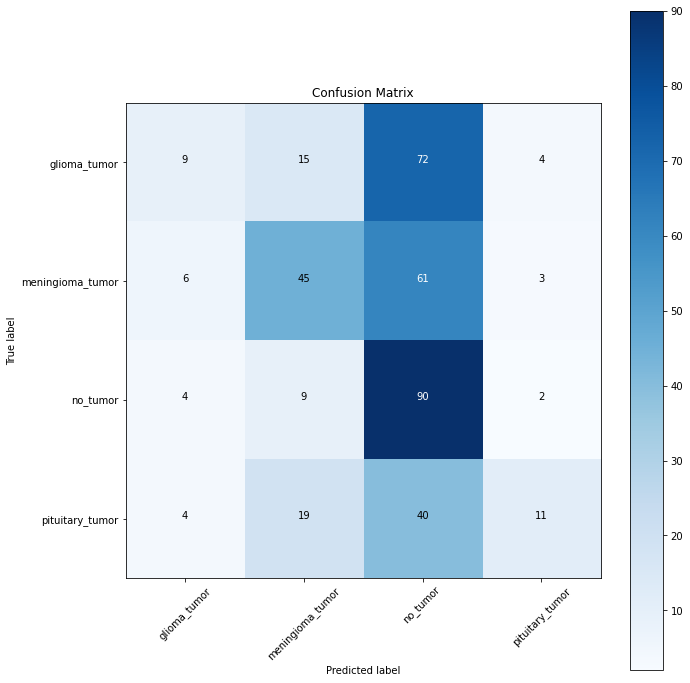

In [36]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

#On test dataset
Y_pred = model.predict_generator(test_generator)
y_pred = np.argmax(Y_pred, axis=1)
target_names = classes

#Confution Matrix
cm = confusion_matrix(test_generator.classes, y_pred)
plot_confusion_matrix(cm, target_names, normalize=False, title='Confusion Matrix')

#Classification Report
print('Classification Report')
print(classification_report(test_generator.classes, y_pred, target_names=target_names))

C:\Users\RECHEL~1\AppData\Local\Temp/ipykernel_16688/1491190874.py:5: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  Y_pred = model.predict_generator(test_generator)
C:\Users\RECHEL~1\AppData\Local\Temp/ipykernel_16688/1491190874.py:16: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  Y_pred = model.predict_generator(test_generator)


Classification Report
                  precision    recall  f1-score   support

    glioma_tumor       0.39      0.09      0.15       100
meningioma_tumor       0.51      0.39      0.44       115
        no_tumor       0.34      0.86      0.49       105
 pituitary_tumor       0.55      0.15      0.23        74

        accuracy                           0.39       394
       macro avg       0.45      0.37      0.33       394
    weighted avg       0.44      0.39      0.34       394



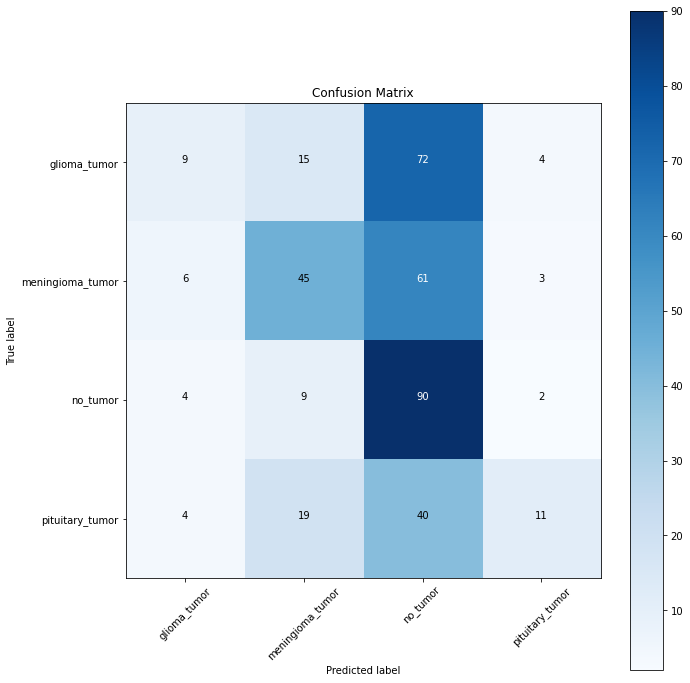

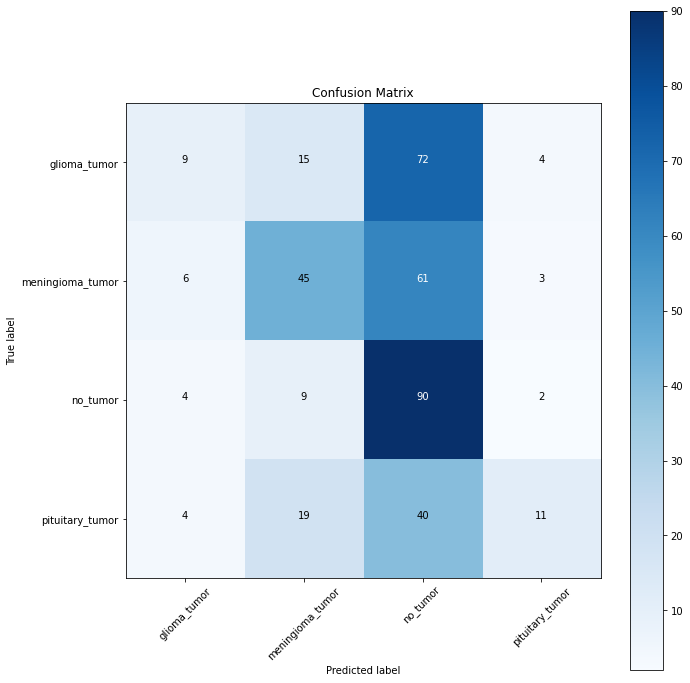

In [25]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

#On test dataset
Y_pred = model.predict_generator(test_generator)
y_pred = np.argmax(Y_pred, axis=1)
target_names = classes

#Confution Matrix
cm = confusion_matrix(test_generator.classes, y_pred)
plot_confusion_matrix(cm, target_names, normalize=False, title='Confusion Matrix')
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

#On test dataset
Y_pred = model.predict_generator(test_generator)
y_pred = np.argmax(Y_pred, axis=1)
target_names = classes

#Confution Matrix
cm = confusion_matrix(test_generator.classes, y_pred)
plot_confusion_matrix(cm, target_names, normalize=False, title='Confusion Matrix')
print('Classification Report')
print(classification_report(test_generator.classes, y_pred, target_names=target_names))

In [37]:
model.save('model.h5')

In [38]:
model = keras.models.load_model('model.h5')

In [39]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 248, 248, 200)     5600      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 124, 124, 200)    0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 122, 122, 100)     180100    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 61, 61, 100)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 59, 59, 100)       90100     
                                                                 
 flatten (Flatten)           (None, 348100)            0

In [45]:
from sklearn.metrics import precision_recall_curve, auc
import matplotlib.pyplot as plt
import numpy as np

# define the number of classes
num_classes = 3

# generate some example data (replace with your own)
y_true = np.random.randint(0, num_classes, size=1000)
y_pred = np.random.rand(1000, num_classes)

# calculate precision and recall for each class
precision = dict()
recall = dict()
average_precision = dict()

for i in range(num_classes):
    precision[i], recall[i], _ = precision_recall_curve((y_test == i).astype(int), y_pred[:, i])
    average_precision[i] = auc(recall[i], precision[i])

# calculate micro-averaged precision and recall
precision["micro"], recall["micro"], _ = precision_recall_curve(y_test.ravel(), y_pred.ravel())
average_precision["micro"] = auc(recall["micro"], precision["micro"])

# plot precision-recall curves
plt.figure(figsize=(8, 5))

# plot class-wise curves
for i in range(num_classes):
    plt.plot(recall[i], precision[i], label=f"Class {i} (AP={average_precision[i]:.2f})")

# plot micro-averaged curve
plt.plot(recall["micro"], precision["micro"], label=f"Micro-average (AP={average_precision['micro']:.2f})", linestyle='--')

# format plot
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

C:\Users\RECHEL~1\AppData\Local\Temp/ipykernel_16688/1186964443.py:18: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  precision[i], recall[i], _ = precision_recall_curve((y_test == i).astype(int), y_pred[:, i])


AttributeError: 'bool' object has no attribute 'astype'

In [28]:
model = load_model('model.h5')

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

img = cv2.imread('C:/Users/bogha/OneDrive/Pictures/gg (282).jpg')
img = cv2.resize(img,(250,250))
img = np.reshape(img,[1,250,250,3])


classes1 = model.predict(img)
classes1


error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'


In [33]:
predicted_class = np.argmax(classes1[0])
predicted_class

0

In [1]:
classes[predicted_class]

NameError: name 'classes' is not defined